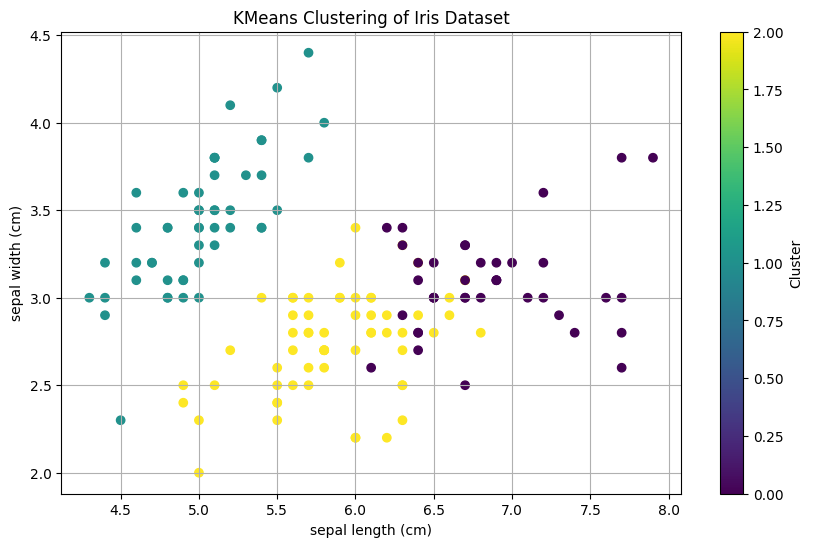

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the iris dataset
iris_data = load_iris()
X = iris_data.data
y = iris_data.target
iris_df = pd.DataFrame(X, columns=iris_data.feature_names)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
iris_df['Cluster'] = labels
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=iris_df['Cluster'], cmap='viridis', marker='o')
plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


In [2]:
from dsgd import DSClassifierMultiQ
#x = X.values
# Create a DSClassifierMultiQ instance
DSC = DSClassifierMultiQ(3, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)

# Fit the model to the data
losses, epoch, dt = DSC.fit(X, labels, add_single_rules=True, single_rules_breaks=3,add_mult_rules=False, column_names=iris_data.feature_names, print_every_epochs=1,print_final_model=False)
# Predict the cluster labels for the data


Optimization started
Processing epoch	200	0.0213	
Training time: 5.57s, epochs: 200

Least training loss reached: 0.021


In [10]:
#rules = DSC.find_most_important_rules(threshold=0.5)
DSC.print_most_important_rules(threshold=0.32)
#rules



Most important rules for class 0

	[0.692] R15: petal width (cm) > 1.712
			0: 0.579	1: 0.000	2: 0.248	Unc: 0.173

	[0.675] R11: petal length (cm) > 4.945
			0: 0.675	1: 0.000	2: 0.000	Unc: 0.325

	[0.559] R3: sepal length (cm) > 6.400
			0: 0.559	1: 0.000	2: 0.000	Unc: 0.441

	[0.388] R6: 3.057 < sepal width (cm) < 3.350
			0: 0.299	1: 0.204	2: 0.001	Unc: 0.496

	[0.365] R7: sepal width (cm) > 3.350
			0: 0.197	1: 0.478	2: 0.000	Unc: 0.325

Most important rules for class 1

	[0.650] R12: petal width (cm) < 0.687
			0: 0.000	1: 0.650	2: 0.000	Unc: 0.350

	[0.601] R8: petal length (cm) < 2.571
			0: 0.000	1: 0.601	2: 0.000	Unc: 0.399

	[0.588] R1: 5.287 < sepal length (cm) < 5.843
			0: 0.000	1: 0.355	2: 0.619	Unc: 0.026

	[0.568] R7: sepal width (cm) > 3.350
			0: 0.197	1: 0.478	2: 0.000	Unc: 0.325

	[0.557] R0: sepal length (cm) < 5.287
			0: 0.000	1: 0.557	2: 0.000	Unc: 0.443

	[0.320] R6: 3.057 < sepal width (cm) < 3.350
			0: 0.299	1: 0.204	2: 0.001	Unc: 0.496

Most important rul

In [8]:
string = """
Most important rules for class 0

	[0.692] R15: petal width (cm) > 1.712
			0: 0.579	1: 0.000	2: 0.248	Unc: 0.173

	[0.675] R11: petal length (cm) > 4.945
			0: 0.675	1: 0.000	2: 0.000	Unc: 0.325

	[0.559] R3: sepal length (cm) > 6.400
			0: 0.559	1: 0.000	2: 0.000	Unc: 0.441

Most important rules for class 1

	[0.650] R12: petal width (cm) < 0.687
			0: 0.000	1: 0.650	2: 0.000	Unc: 0.350

	[0.601] R8: petal length (cm) < 2.571
			0: 0.000	1: 0.601	2: 0.000	Unc: 0.399

	[0.588] R1: 5.287 < sepal length (cm) < 5.843
			0: 0.000	1: 0.355	2: 0.619	Unc: 0.026

	[0.568] R7: sepal width (cm) > 3.350
			0: 0.197	1: 0.478	2: 0.000	Unc: 0.325

	[0.557] R0: sepal length (cm) < 5.287
			0: 0.000	1: 0.557	2: 0.000	Unc: 0.443

Most important rules for class 2

	[0.776] R1: 5.287 < sepal length (cm) < 5.843
			0: 0.000	1: 0.355	2: 0.619	Unc: 0.026

	[0.669] R9: 2.571 < petal length (cm) < 3.758
			0: 0.000	1: 0.000	2: 0.669	Unc: 0.331

	[0.635] R10: 3.758 < petal length (cm) < 4.945
			0: 0.000	1: 0.000	2: 0.635	Unc: 0.365

	[0.604] R2: 5.843 < sepal length (cm) < 6.400
			0: 0.000	1: 0.000	2: 0.604	Unc: 0.396

	[0.601] R13: 0.687 < petal width (cm) < 1.199
			0: 0.000	1: 0.000	2: 0.601	Unc: 0.399

	[0.574] R14: 1.199 < petal width (cm) < 1.712
			0: 0.001	1: 0.000	2: 0.573	Unc: 0.425

	[0.546] R4: sepal width (cm) < 2.764
			0: 0.000	1: 0.000	2: 0.546	Unc: 0.454
"""

In [6]:
from transformers import pipeline

generator = pipeline("text-generation", model="EleutherAI/gpt-neo-1.3B")

/home/dani/Documents/GitHub/trabajo-dirigido/venv3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cuda:0


In [9]:
prompt = "I want you to interpret the following rules and generate a text that explains them in a simple way. The rules are:\n" + string
# Generate text using the model
result = generator(prompt, do_sample=True, temperature=0.7, max_length=2048)
# Print the generated text

print(result[0]["generated_text"])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


I want you to interpret the following rules and generate a text that explains them in a simple way. The rules are:

Most important rules for class 0

	[0.692] R15: petal width (cm) > 1.712
			0: 0.579	1: 0.000	2: 0.248	Unc: 0.173

	[0.675] R11: petal length (cm) > 4.945
			0: 0.675	1: 0.000	2: 0.000	Unc: 0.325

	[0.559] R3: sepal length (cm) > 6.400
			0: 0.559	1: 0.000	2: 0.000	Unc: 0.441

Most important rules for class 1

	[0.650] R12: petal width (cm) < 0.687
			0: 0.000	1: 0.650	2: 0.000	Unc: 0.350

	[0.601] R8: petal length (cm) < 2.571
			0: 0.000	1: 0.601	2: 0.000	Unc: 0.399

	[0.588] R1: 5.287 < sepal length (cm) < 5.843
			0: 0.000	1: 0.355	2: 0.619	Unc: 0.026

	[0.568] R7: sepal width (cm) > 3.350
			0: 0.197	1: 0.478	2: 0.000	Unc: 0.325

	[0.557] R0: sepal length (cm) < 5.287
			0: 0.000	1: 0.557	2: 0.000	Unc: 0.443

Most important rules for class 2

	[0.776] R1: 5.287 < sepal length (cm) < 5.843
			0: 0.000	1: 0.355	2: 0.619	Unc: 0.026

	[0.669] R9: 2.571 < petal length (cm

In [7]:

# Function to generate text
def generate_text_from_model(prompt, max_length=50, temperature=0.7):

    # Encoding prompt to token
    input_ids = tokenizer.encode(prompt, return_tensors="pt")

    # Generate text
    output = model.generate(
        input_ids,
        max_length=max_length,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        top_k=50,
        top_p=0.95,
        temperature=temperature,
    )

    # Decode and return generated text
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

    return generated_text